In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_sample = pd.read_csv('DataSample__201709211530.csv')
data_sample2 = pd.read_csv('DataSample__201710061552.csv',dtype={"value": str})
#data_sample2['value'] = pd.to_numeric(data_sample2['value'],errors='coerce')
#data_sample['value'] = pd.to_numeric(data_sample['value'],errors='coerce')
data_sample = data_sample.append(data_sample2)
data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])
data_sample['owner'].replace('00000000-5854-8d6f-b8eb-cf14a0f795df','00000000-56ff-538b-2223-e1800b5e3ddb',inplace=True)


types = data_sample['type'].unique()
types

for t in types:
    f = lambda x: float(x.replace(',',''))
    # checks if the values contain decimal points, and uses a float conversion if so
    for v in data_sample.loc[data_sample['type'] == t, 'value'].head():
        if '.' in v:
            f = lambda x: float(x.replace(',',''))
            break
    data_sample.loc[data_sample['type'] == t, 'value'] = data_sample.loc[data_sample['type'] == t, 'value'].map(f)
for col in ['startDate', 'endDate', 'createdAt', 'updatedAt']:
    data_sample[col] = pd.to_datetime(data_sample[col], format='%Y-%m-%d %X')
to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample.head() #0 - 6 is monday - sunday

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,duration,day_of_week
0,1ff0fb89-6e1b-4601-84d0-98c79fdc5f2e,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,A1DB680E-F9C4-4FA4-8818-1D35E398B5F0,Health Mate,health-bmi,2014-08-27 21:41:23,2014-08-27 21:41:23,26.7387,NaN,NaN,2017-08-31 11:20:49,2017-08-31 11:20:49,0 days,2
1,78219621-1da4-4e3b-87bc-f4885718c63f,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,2030515A-1C70-40F3-8470-BDE99ABFC906,Health Mate,health-weight,2014-08-27 21:41:23,2014-08-27 21:41:23,71.042,NaN,NaN,2017-08-31 11:20:58,2017-08-31 11:20:58,0 days,2
2,2d917e7e-0844-4f52-b15e-2a5346c96dda,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,96D21A44-67D7-412D-BF3A-543819A8EBF0,Health Mate,health-bmi,2014-08-28 06:24:53,2014-08-28 06:24:53,26.5866,NaN,NaN,2017-08-31 11:20:49,2017-08-31 11:20:49,0 days,3
3,ab800f4b-bef7-434e-8e57-e0fccc44bfb7,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,5D73FD9D-17E1-480C-9235-3E5036503E6A,Health Mate,health-body-fat,2014-08-28 06:24:53,2014-08-28 06:24:53,0.258699,NaN,NaN,2017-08-31 11:20:53,2017-08-31 11:20:53,0 days,3
4,fb2a0865-17c3-4ac0-a782-749cc7befe12,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,5A9AB03C-30C9-43B9-9742-02E237A6F36D,Health Mate,health-weight,2014-08-28 06:24:53,2014-08-28 06:24:53,70.638,NaN,NaN,2017-08-31 11:20:58,2017-08-31 11:20:58,0 days,3


In [3]:
data_sample['type'].unique()

array(['health-bmi', 'health-weight', 'health-body-fat', 'health-sleep',
       'health-heart-rate', 'health-step-count'], dtype=object)

In [4]:
steps = data_sample[data_sample['type'] == 'health-step-count']
steps.head()

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,duration,day_of_week
4704,13109bff-f113-4e60-be9c-775704362497,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,0266D321-9615-4671-BAD6-82591AD82136,Health Mate,health-step-count,2017-08-01 18:41:00,2017-08-01 18:42:00,90,NaN,NaN,2017-08-31 11:24:40,2017-08-31 11:24:40,00:01:00,1
4705,64fa3f41-6c61-4e18-b15d-0576cffb044c,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.health.CAD564E9-53CC-4C8F-...,618AA830-19CC-488B-81EE-DEC0E4E24A3C,Rostom 2,health-step-count,2017-08-01 18:41:24,2017-08-01 18:42:26,91,NaN,NaN,2017-08-31 11:24:40,2017-08-31 11:24:40,00:01:02,1
4706,a9649961-af44-4b5b-91f9-f8303d64a30a,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,3AE610F8-E609-411E-98FC-154AF9DC5383,Health Mate,health-step-count,2017-08-01 18:42:00,2017-08-01 18:43:00,90,NaN,NaN,2017-08-31 11:24:40,2017-08-31 11:24:40,00:01:00,1
4707,f3d9bda7-4201-4d41-aa48-90eff0491ca7,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.health.CAD564E9-53CC-4C8F-...,4858CD3F-A62E-4A0C-9394-70FECBD92A69,Rostom 2,health-step-count,2017-08-01 18:42:26,2017-08-01 18:43:27,109,NaN,NaN,2017-08-31 11:24:40,2017-08-31 11:24:40,00:01:01,1
4708,7a099290-79f1-4c57-9026-068584765333,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,55B0736C-E686-4BB5-8AB7-A4F82E74AE3D,Health Mate,health-step-count,2017-08-01 18:43:00,2017-08-01 18:44:00,90,NaN,NaN,2017-08-31 11:24:40,2017-08-31 11:24:40,00:01:00,1


In [5]:
steps.index = steps['startDate']
steps['value'] = pd.Series(steps['value']).convert_objects(convert_numeric=True)

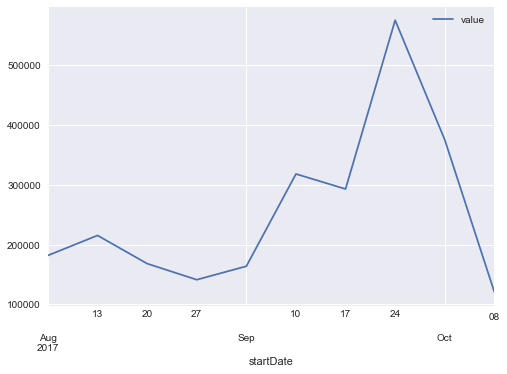

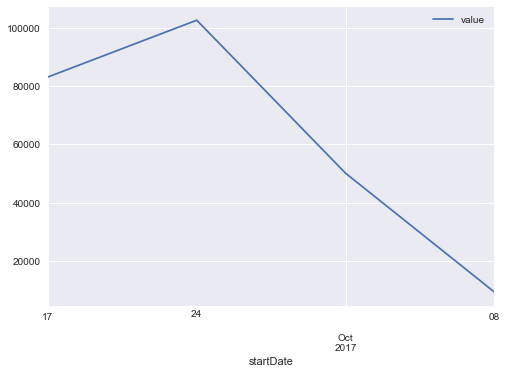

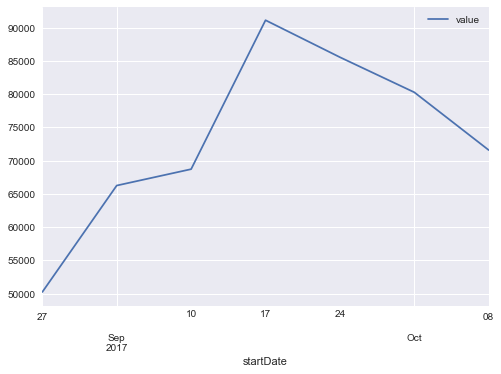

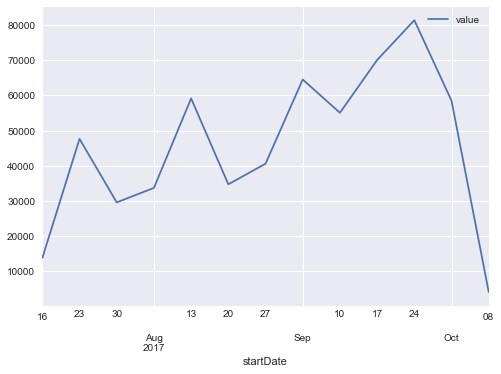

In [18]:
# weekly steps
for owner in steps['owner'].unique():
    steps[steps['owner'] == owner][['value']].resample('W').sum().plot()

  value                                                                  \
  count          mean           std      min      25%      50%      75%   
0   9.0  29725.777778  26147.620895   1274.0  11922.0  16710.0  58236.0   
1  10.0  49834.100000  47089.194817   2792.0  26290.5  40019.5  48738.0   
2  10.0  40033.700000  20532.687306   8232.0  29215.5  38593.0  55655.5   
3  10.0  32997.600000  16792.737439   7990.0  22673.5  27435.0  46392.0   
4  10.0  37192.700000  24173.808379  11485.0  16700.5  29546.0  57267.5   
5   9.0  37949.333333  25876.795474   6742.0  26886.0  29052.0  51668.0   
6   9.0  38301.222222  28856.149422   5576.0  19158.0  26324.0  58332.0   

             
        max  
0   71400.0  
1  174002.0  
2   69916.0  
3   58126.0  
4   78862.0  
5   93416.0  
6   86648.0  
  value                                                                     
  count      mean           std     min      25%      50%       75%      max
0   4.0   4728.50   4605.729801   809.0  240

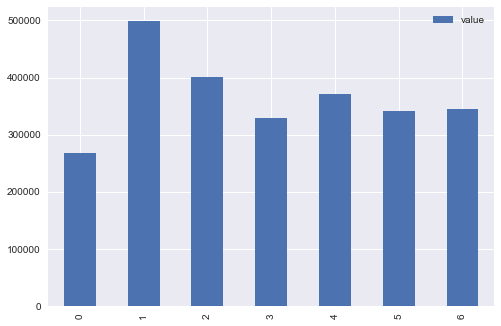

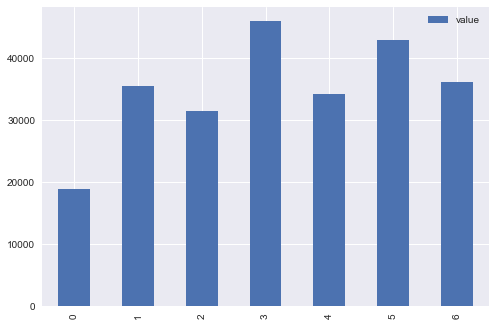

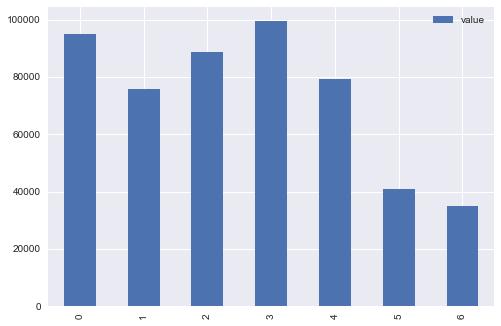

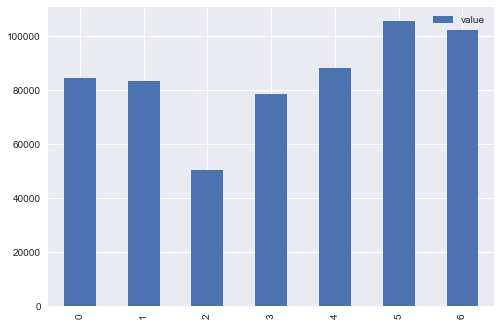

In [16]:
# steps by day of the week
for owner in steps['owner'].unique():
    data_by_owner = steps[steps['owner'] == owner][['value']]
    data_by_owner.groupby(lambda x: x.dayofweek).sum().plot(kind='bar')
    print(data_by_owner.resample('D').sum().groupby(lambda x: x.dayofweek).describe())

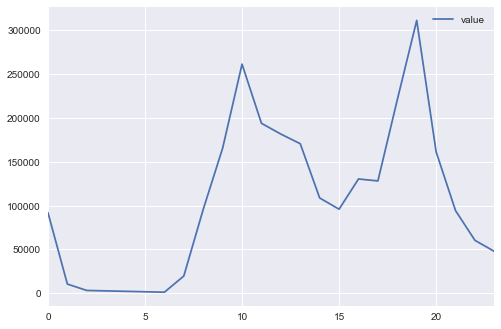

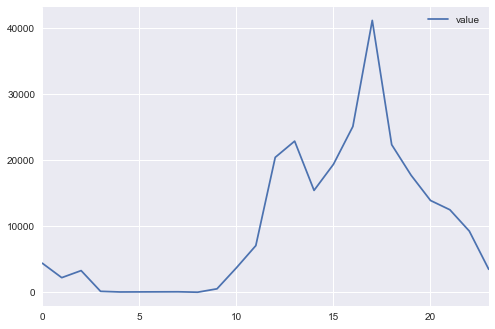

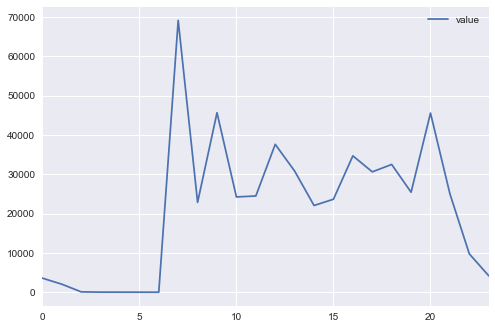

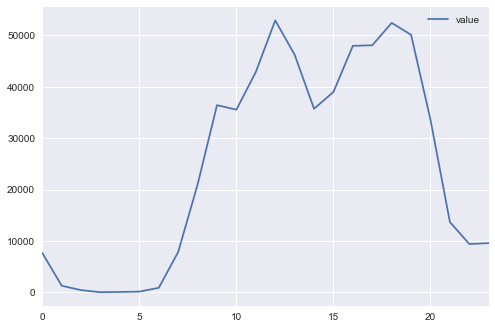

In [14]:
# steps by time of day
for owner in steps['owner'].unique():
    data_by_owner = steps[steps['owner'] == owner][['value']]
    data_by_owner.groupby(lambda x: x.hour).sum().plot()